In [1]:
from fplot import fplot

[<AxesSubplot:>] (1,) [[1, 2, 3, 3], [3, 3, 2, 1]]
layer scatter [1, 2, 3, 3] (1,) 1 [1, 2, 3, 3]
ax AxesSubplot(0.125,0.11;0.775x0.77) 1


TypeError: matplotlib.axes._axes.Axes.scatter() argument after * must be an iterable, not int

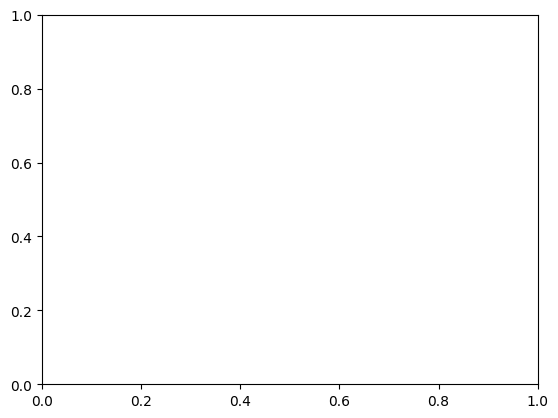

In [74]:
import matplotlib.pyplot as plt

# get the shape of the input
# Make it 1d
# make the axs 1d
# plot everything

flat_n = lambda lsts, n: lsts if n <= 1 else flat_n([e for sl in lsts for e in sl], n-1)
get_shape = lambda lst: (len(lst), *get_shape(lst[0])) if isinstance(lst, list) else ()

def subplots(axs, t, val, args={}):
    for ax, v in zip(axs, val):
        print("ax", ax, v)
        if t == "img": ax.imshow(v)
        else: getattr(ax, t)(*v)
        ax.label_outer()

def stack(axs_, shape, t, layer):
    correction = -1 if shape and shape[0] == 1 else 0
    axs = flat_n(axs_, len(shape) + correction)
    for val in layer:
        print("layer", t, val, shape, len(shape), flat_n(val, 0))
        subplots(axs, t, flat_n(val, len(shape)))

def fplot(t, layer, style={}):
    shape    = get_shape(layer)[:-2]
    fig, axs = plt.subplots(*shape)
    axs_    = axs   if shape else [axs]
    shape_  = shape if shape else (1,)
    print(axs_, shape_, layer)
    stack(axs_, shape_, t, layer)
    for k, v in style.items():
        getattr(plt, k)(v)
        
def single_ax_arr(shape):
    fig, axs = plt.subplots(*shape)
    axs_ = axs if shape else [axs]
    return fig, axs_

fplot("scatter", [[1,2,3,3],[3,3,2,1]])

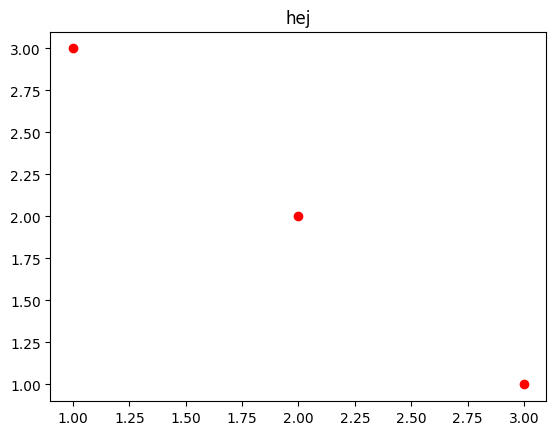

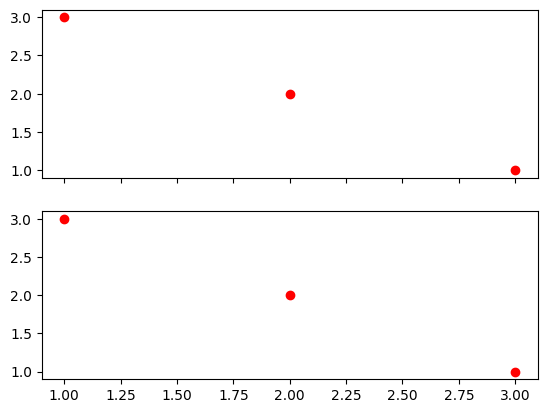

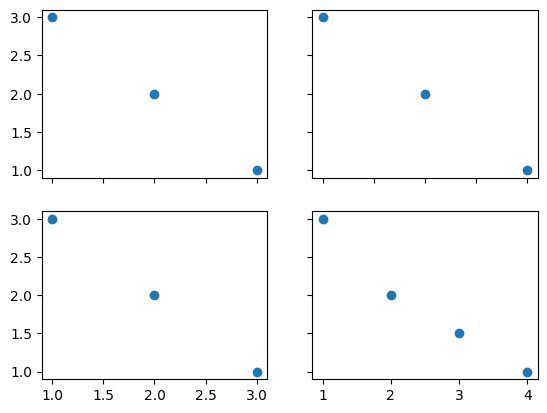

In [117]:
def get_shape(lst):
    if hasattr(lst, '__iter__'):
        return (len(lst), *get_shape(lst[0]))
    else:
        return ()

def flatten(lsts):
    return [e for sl in lsts for e in sl]

def flat_nd(lsts, n):
    dims = len(get_shape(lsts))
    if dims > n: return flat_nd(flatten(lsts), n)
    if dims < n: return flat_nd([lsts], n)
    return lsts
    
flat_nd([[1,2,3],[4,5,6]], 3) == [[[1, 2, 3], [4, 5, 6]]] and \
flat_nd([[1,2,3],[4,5,6]], 1) == [1,2,3,4,5,6]

def f_plot(t, val, args={}, style={}):
    shape    = get_shape(val)[:-2]
    fig, axs = plt.subplots(*shape)
    axs_ = flat_nd(axs, 1)
    val_ = flat_nd(val, 3)
    for ax, v in zip(axs_, val_):
        if t == "imshow": ax.imshow(v, **args)
        else: getattr(ax, t)(*v, **args)
        ax.label_outer()
    for k, v in style.items():
        getattr(plt, k)(v)
    
f_plot("scatter", 
       [[1,2,3],[3,2,1]], 
       {"c": "red"}, 
       {'title': 'hej'})
f_plot("scatter", [[[1,2,3],[3,2,1]],
                   [[1,2,3],[3,2,1]]],
      {"c": "red"})
f_plot("scatter", [[[[1,2,3],[3,2,1]],
                    [[1,2,3],[3,2,1]]],
                   [[[1,2,3],[3,2,1]],
                    [[1,2,3,4],[5,3,2,1]]]])

NameError: name 'layers' is not defined

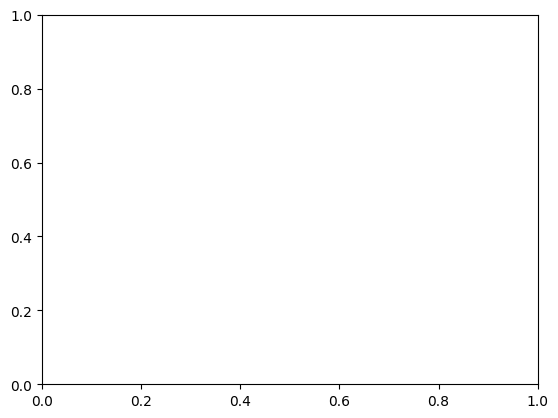

In [66]:
fplot("scatter", [[1,2,3,3],[3,3,2,1]])

In [11]:
flat_n([[1],[2]], 2) == [1,2] and \
flat_n([[1],[2]], 1) == [[1],[2]]

True

In [16]:
get_shape([1]) == (1,) and \
get_shape([2,2]) == (2,) and \
get_shape([[2],[3]]) == (2,1,)

True

In [ ]:
def to_shape(arr, shape):
    

[<AxesSubplot:>] (1,) (['scatter', [[1, 2, 3], [3, 2, 1]], {'c': 'red'}], ['plot', [[[1, 2, 3], [3, 2, 1]], [[1, 2, 3], [3, 2, 1]]], {'c': 'green'}], ['bar', [[[1, 2, 3], [3, 2, 1]], [[1, 2, 3], [3, 2, 1]]]])
layer scatter [[1, 2, 3], [3, 2, 1]] [{'c': 'red'}]
ax AxesSubplot(0.125,0.11;0.775x0.77) [1, 2, 3]
layer plot [[[1, 2, 3], [3, 2, 1]], [[1, 2, 3], [3, 2, 1]]] [{'c': 'green'}]
ax AxesSubplot(0.125,0.11;0.775x0.77) [[1, 2, 3], [3, 2, 1]]
layer bar [[[1, 2, 3], [3, 2, 1]], [[1, 2, 3], [3, 2, 1]]] []
ax AxesSubplot(0.125,0.11;0.775x0.77) [[1, 2, 3], [3, 2, 1]]


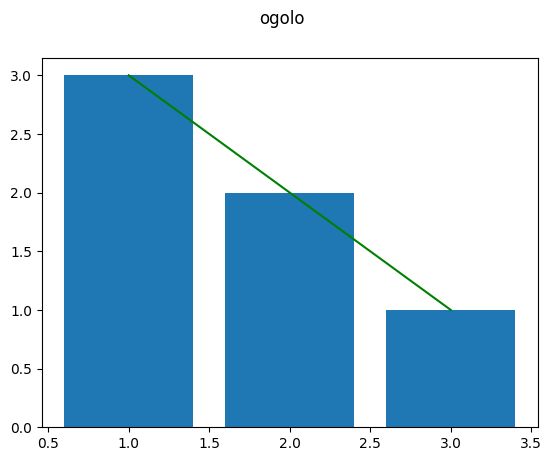

In [57]:
fplot(["scatter", [[[1,2,3],[3,2,1]],[[1,2,3],[3,2,1]]], {"c": "red"}], 
      ["plot",    [[[1,2,3],[3,2,1]],[[1,2,3],[3,2,1]]], {"c": "green"}], 
      ["bar",     [[[1,2,3],[3,2,1]],[[1,2,3],[3,2,1]]]], 
      style={"suptitle": "ogolo"})